## Import the libraries

In [2]:
# Python
import pickle
import math, time, random
from datetime import datetime, timedelta, date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-talk')
import seaborn as sns
colormap = plt.cm.RdBu
plt.rcParams['font.size'] = 10

# Data Prep
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Model Training
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor,StackingRegressor,VotingRegressor
from xgboost.sklearn import XGBRegressor
from xgboost import plot_importance
from scipy.stats import norm
from scipy import stats

#Model Evaluation
from sklearn.metrics import mean_squared_log_error, mean_squared_error

# Warning Control
import warnings
warnings.filterwarnings('ignore')

#file import, load
from google.colab import files
from joblib import dump, load


## Importing the dataset

In [ ]:
files.upload()

In [4]:
train = pd.read_csv('solar_weather_two_years_update.csv')

In [5]:
train.head()

,Date,Generated,Efficiency,Exported,Consumption,PeakPower,PeakTime,Condition,MinTemp,MaxTemp,...,dewpoint_temp,relative_humidity,wind_speed,wind_direction,surface_pressure,cloud_cover,total_precipitation,snowfall,lat,lon
0,20220427,35971,6.516,20168,0,4978,12:45,Fine,8,16,...,6.82,0.88,5.22,250.87,100816.28,1.00,0.0,0,37.804456,-122.271356
1,20220426,36148,6.549,21301,0,4784,13:10,Fine,10,18,...,8.87,0.89,5.72,257.15,100852.61,1.00,0.0,0,37.804456,-122.271356
2,20220425,36186,6.555,20413,0,4732,13:25,Fine,10,20,...,8.49,0.89,4.57,259.59,101088.89,1.00,0.0,0,37.804456,-122.271356
3,20220424,35291,6.393,17824,0,4655,13:30,Fine,9,20,...,9.25,0.96,4.40,273.80,101249.99,0.39,0.0,0,37.804456,-122.271356
4,20220423,36001,6.522,17440,0,4693,13:20,Fine,8,20,...,8.33,0.92,5.26,298.42,101525.31,0.97,0.0,0,37.804456,-122.271356


# Exploratory Data Analysis 


###Target Distribution

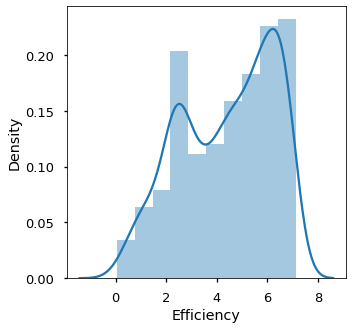

In [6]:
plt.figure(figsize=(5, 5))
sns.distplot(train['Efficiency'])

### Qualitative vs Quantitative Data Types

### Types of Data Variables

In [7]:
dfnum = train.select_dtypes(include=['float64','int64'])
dfcat= train.select_dtypes(include=[object])
dftime = train.select_dtypes(include=['datetime64','timedelta64'])

### Outlier Values
Boxplots summarize the distribution of each attribute, drawing a line for the median, the 25th and 75th percentiles. The whiskers give an idea of the spread of the data and dots outside of the whiskers
show **outlier values**.

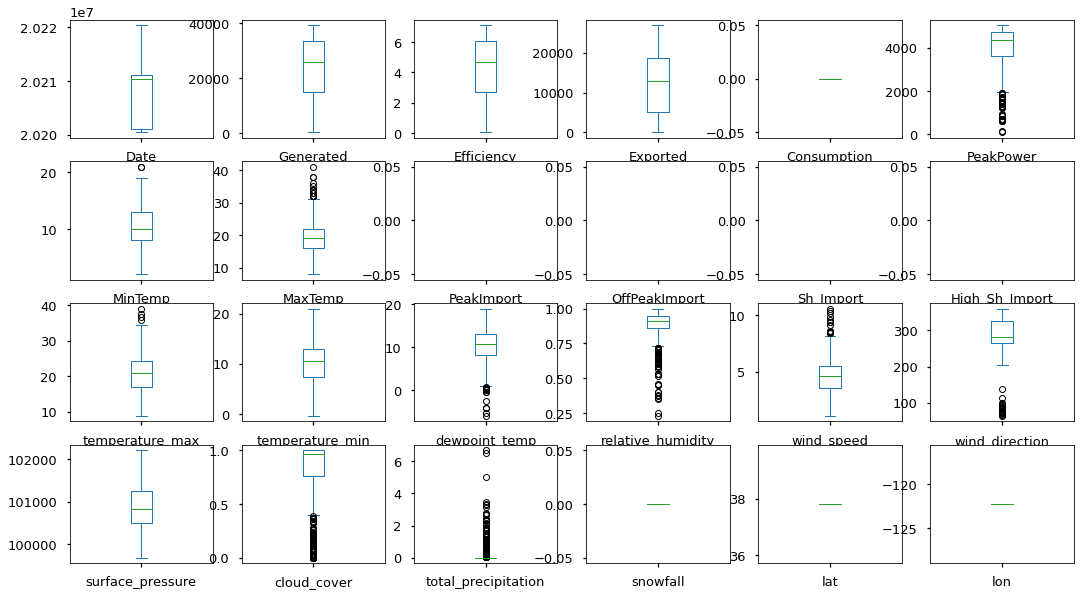

In [8]:
dfnum.plot(kind='box', subplots=True, layout=(4,6), sharex=False,figsize=(18,10))
plt.show()

###Inconsistent values

The below code shows the data type and values of each column. Review columns and see if the data type matches the column values.

In [9]:
def check_values(df):
 return pd.DataFrame({"values":{col:df[col].unique() for col in df},'type':{col:df[col].dtype for col in df}})


In [10]:
check_values(train)

,values,type
Date,"[20220427, 20220426, 20220425, 20220424, 20220...",int64
Generated,"[35971, 36148, 36186, 35291, 36001, 35694, 234...",int64
Efficiency,"[6.516, 6.549, 6.555, 6.393, 6.522, 6.466, 4.2...",float64
Exported,"[20168, 21301, 20413, 17824, 17440, 20393, 867...",int64
Consumption,[0],int64
PeakPower,"[4978, 4784, 4732, 4655, 4693, 5048, 4922, 499...",int64
PeakTime,"[12:45, 13:10, 13:25, 13:30, 13:20, 11:50, 14:...",object
Condition,"[Fine, Partly Cloudy, Mostly Cloudy, Cloudy, S...",object
MinTemp,"[8, 10, 9, 11, 6, 7, 12, 14, 5, 3, 4, 13, 16, ...",int64
MaxTemp,"[16, 18, 20, 19, 17, 15, 13, 14, 24, 31, 27, 2...",int64


In [11]:
train.drop(['Generated','Exported','PeakPower', 'PeakTime', 'Condition','Consumption', 'MinTemp','MaxTemp', 'PeakImport', 'OffPeakImport', 'Sh_Import', 'High_Sh_Import'], axis=1, inplace=True)

##Missing Data

In [12]:
def check_missing(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent missing'])

In [13]:
check_missing(train) #percentage of missing value

,Total,Percent missing
Date,0,0.0
Efficiency,0,0.0
temperature_max,0,0.0
temperature_min,0,0.0
dewpoint_temp,0,0.0
relative_humidity,0,0.0
wind_speed,0,0.0
wind_direction,0,0.0
surface_pressure,0,0.0
cloud_cover,0,0.0


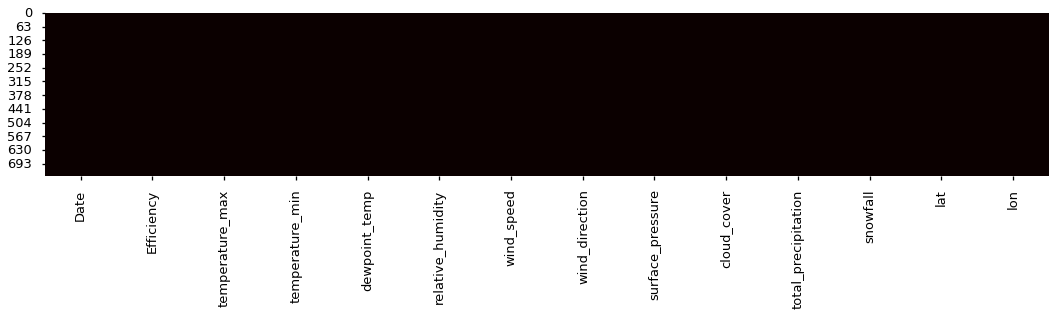

In [14]:
#@title
plt.figure(figsize=(18,3))
sns.heatmap(train.isnull(), cbar=False, cmap = "hot")

# Feature Engineering

#### Correlated Features
Correlation gives an indication of how related the changes are between two variables. If two
variables change in the same direction they are positively correlated.

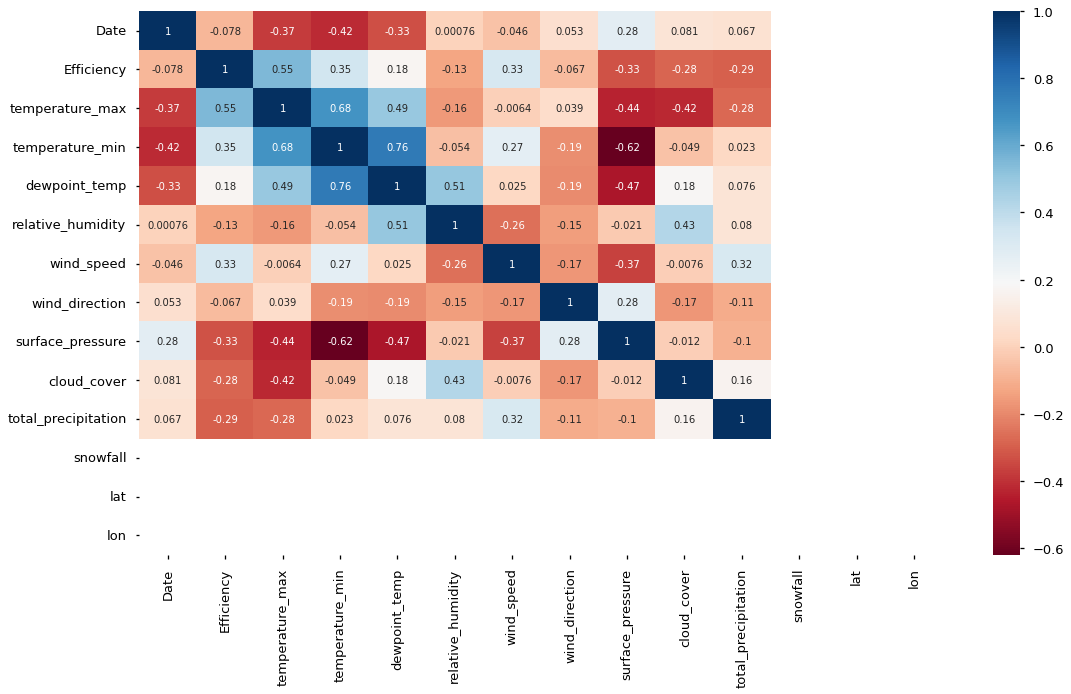

In [15]:
plt.figure(figsize=(18,10))
sns.heatmap(train.corr(), annot=True, cmap=colormap)

####Datetime Features

In [16]:
train["Date"] = train["Date"].astype(str)

In [17]:
train["DateTime"] = train["Date"].apply(lambda x: datetime.strptime(x, "%Y%m%d"))

In [18]:
# parse datetime column 
dt = pd.DatetimeIndex(train['DateTime'])
train.set_index(dt, inplace=True)

In [19]:
train['dt_date'] = dt.date
train['day'] = dt.day
train['month'] = dt.month
train['year'] = dt.year
train['dayweek'] = dt.dayofweek

In [20]:
grouped_date_df = train.groupby('dt_date') 
grouped_day_df = train.groupby('day')
grouped_month_df = train.groupby('month')
grouped_year_df = train.groupby('year')


In [21]:
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
train['day_name'] = train['DateTime'].dt.dayofweek.map(dayOfWeek)

In [22]:
grouped_dayweek_df = train.groupby('day_name',sort=False)

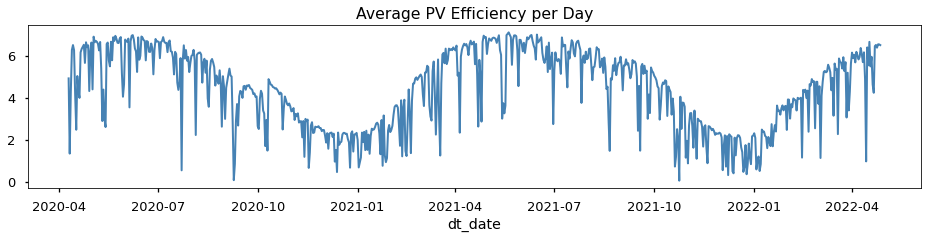

In [23]:
grouped_date_df['Efficiency'].agg(np.mean).plot(linewidth=2,color='steelblue',title ="Average PV Efficiency per Day", figsize=(16, 3));

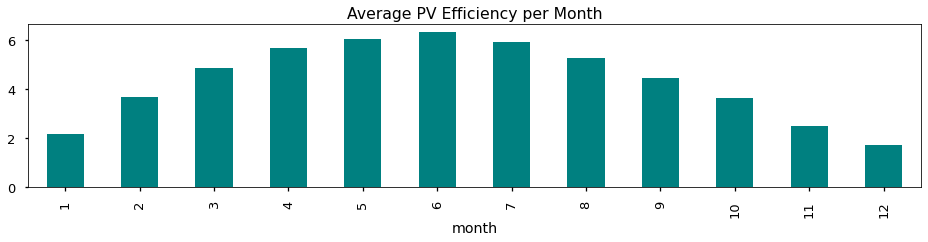

In [24]:
grouped_month_df['Efficiency'].agg(np.mean).plot(kind='bar', linewidth=2,color='teal',title ="Average PV Efficiency per Month", figsize=(16, 3));

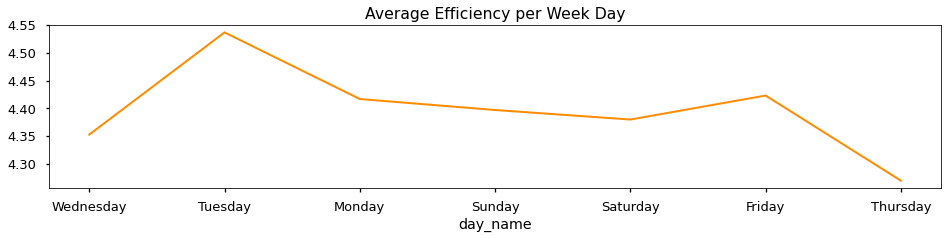

In [25]:
grouped_dayweek_df['Efficiency'].agg(np.mean).plot(linewidth=2,color='darkorange',title ="Average Efficiency per Week Day", figsize=(16, 3));

In [26]:
train.reset_index(drop=True, inplace=True)

## One Hot Encoding

In [27]:
def check_cat_features(df):
  categoricals = [var for var in df.columns if df[var].dtype !='int64' and df[var].dtype !='float64']
  return df[categoricals].columns

In [28]:
check_cat_features(train)

Index(['Date', 'DateTime', 'dt_date', 'day_name'], dtype='object')

In [29]:
train.drop(['Date', 'DateTime', 'dt_date', 'dayweek', 'day_name'], axis=1, inplace=True)

In [30]:
#dates droped and no need to encode
cats_to_encode=[]

In [31]:
le = LabelEncoder()
for var in cats_to_encode:
    le = LabelEncoder()
    train[var]=le.fit_transform(train[var].astype('str'))

In [32]:
check_cat_features(train)

Index([], dtype='object')

##Feature Importance

In [33]:
xgb = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                 max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

In [34]:
label = train['Efficiency'].tolist()

In [35]:
features = train.drop(['Efficiency'], axis = 1)

In [36]:
#xgb.fit(features._get_numeric_data(),label)
xgb.fit(features,label)

[04:47:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.7, learning_rate=0.01, min_child_weight=0,
             n_estimators=3460, nthread=-1, reg_alpha=6e-05, seed=27,
             subsample=0.7)

In [37]:
#@title
important_feats = xgb.feature_importances_

In [38]:
def feature_importances (model, X, y, percentage):
  model.fit(X,y)
  sorted_idx = model.feature_importances_.argsort()
  feat_importances = pd.Series(model.feature_importances_[sorted_idx], index=X.columns[sorted_idx])
  feat_importances = feat_importances.to_frame(name='FeatureRating')
  return feat_importances.sort_values('FeatureRating',ascending=False).head(round(percentage*len(feat_importances)))

In [39]:
selected_features = feature_importances(xgb, features, label, 0.6)

[04:47:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


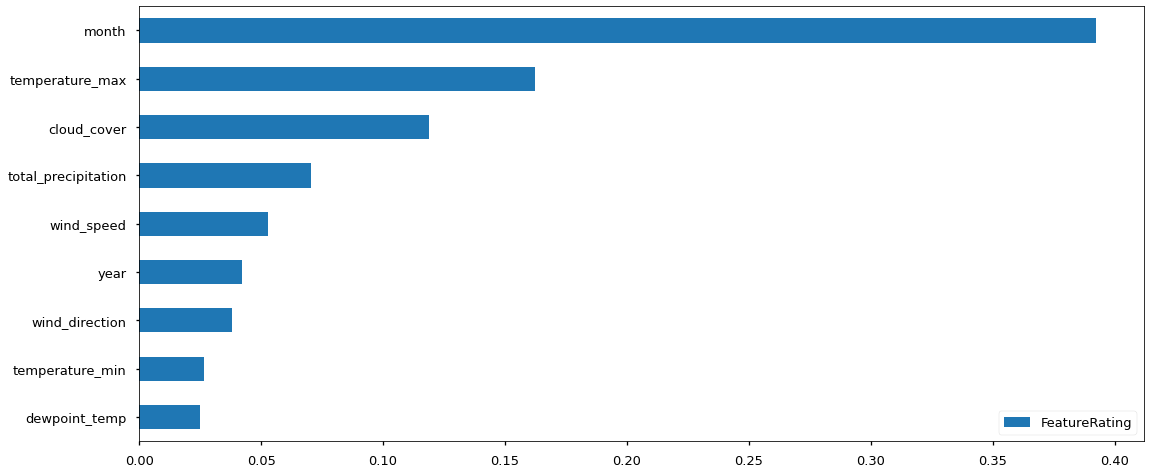

In [40]:
selected_features.sort_values('FeatureRating',ascending=True).plot(kind='barh', figsize = (18,8))

## Feature Selection

In [41]:
selected_cols = selected_features.index.to_list()

In [42]:
selected_train = train[selected_cols]

# Model Training

##Split Train and Test Data

In [43]:
y=train['Efficiency']
X=train.drop('Efficiency', axis=1)

In [47]:
# feature_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(selected_train, y, test_size=0.3, random_state=0)

### Regression Model Assumptions

Transformation is required to treat the skewed features and make them normally distributed.

In [48]:
def normality_plot(X):

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    sns.distplot(X, fit=norm, ax=axes[0])
    axes[0].set_title('Distribution Plot')

    axes[1] = stats.probplot((X), plot=plt)
    plt.tight_layout()


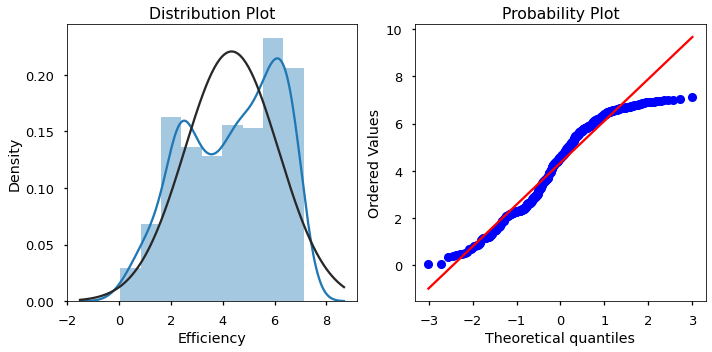

In [54]:
normality_plot(y_train)

In [55]:
#Return the natural logarithm of one plus the input array, element-wise to log-normalize data
y_train_log = np.log1p(y_train)

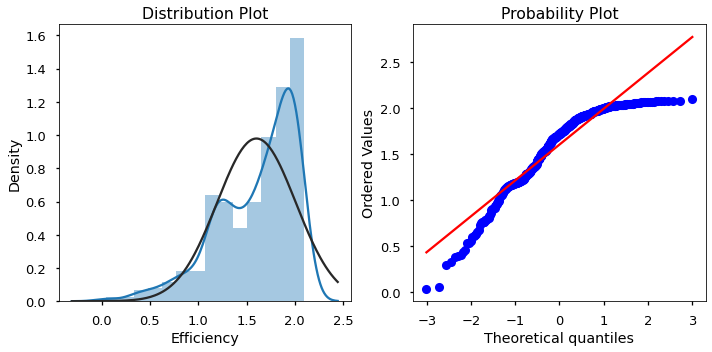

In [56]:
normality_plot(y_train_log)

##Machine Learning Algorithms

In [57]:
model_names = ['LinearRegression', 'Ridge', 'Lasso', 'RandomForestRegressor', 'BaggingRegressor', 'GradientBoostingRegressor', 'AdaBoostRegressor', 'XGBRegressor', ]  

In [58]:
regressions = [
    LinearRegression(),
    Ridge(),
    Lasso(alpha =0.0005, random_state=0),
    RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=0),
    BaggingRegressor(n_estimators = 200, n_jobs = -1, random_state = 10),
    GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =0),
    AdaBoostRegressor(n_estimators=100, random_state=0), 
    XGBRegressor(learning_rate=0.01,n_estimators=3460,
                 max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006),]

Every model in Scikit-learn has a score method after being trained on X_train, y_train. Models have a score method providing a default evaluation criterion for the problem they are designed to solve. 

In [59]:
def predict_models(names, models, X_train, y_train):

    y_preds = []
    for name, model in zip(names, models):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_train).tolist()
        y_preds.append(y_pred)
 
    pred_dict = dict(zip(names, y_preds))
    pred_dict = pd.DataFrame.from_dict(pred_dict)
    return pred_dict

In [60]:
pred_dict = predict_models(model_names, regressions, X_train, y_train)

[04:51:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [61]:
pred_dict.head()

,LinearRegression,Ridge,Lasso,RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor,XGBRegressor
0,4.889864,4.778187,4.874443,4.367395,4.492990,4.736050,4.193806,4.739341
1,6.309690,6.272331,6.305211,5.376281,5.261850,5.079972,5.342828,5.272454
2,2.049942,2.105622,2.060344,2.823249,2.863305,2.857910,2.967054,2.621214
3,6.202987,6.129168,6.196689,6.319963,6.426505,6.615715,5.541989,6.447137
4,3.996450,4.110005,4.009076,5.182232,5.630710,6.035416,5.127581,5.932770


In [62]:
pred_dict_log = predict_models(model_names, regressions, X_train, y_train_log)
pred_dict_log = pred_dict_log

[04:51:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [63]:
pred_dict_log.head()

,LinearRegression,Ridge,Lasso,RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor,XGBRegressor
0,1.716614,1.695974,1.703175,1.663311,1.702335,1.746628,1.540865,1.744649
1,2.058853,2.051797,2.057008,1.844599,1.822572,1.806759,1.783780,1.843979
2,1.153478,1.163628,1.160753,1.331265,1.337133,1.349034,1.225258,1.298897
3,2.032801,2.018799,2.028177,1.982962,2.000695,2.024609,1.735019,1.988223
4,1.520228,1.541035,1.535699,1.763206,1.843527,1.938302,1.638079,1.880546


In [64]:
pred_dict_sel = predict_models(model_names, regressions, X_train_sel, y_train_sel)

[04:51:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [65]:
pred_dict_sel.head()

,LinearRegression,Ridge,Lasso,RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor,XGBRegressor
0,4.783838,4.781335,4.783580,4.351757,4.529780,4.729013,4.137273,4.724240
1,6.076407,6.079893,6.080066,5.563075,5.283270,5.083003,5.149164,5.336614
2,2.248248,2.252108,2.250147,2.722593,2.795255,2.867970,2.666800,2.555328
3,6.070954,6.077084,6.077189,6.264632,6.408260,6.628841,5.365000,6.508322
4,4.195891,4.194781,4.196595,5.272698,5.814575,6.346833,4.984519,5.884542


# Model Evaluation

Root Mean Squared Error

RMSE is the square root of MSE which measures accuracy, to compare errors of different calculation models for the same dataset. RMSE is an example of a Euclidean distance between two regressions by averaging they specific vector errors over a whole regression.

$$ RMSE = \sqrt{\sum_{i=1}^{N}(y_i-y_{i}^{pred})^2} $$

###Performance Metrics

In [66]:
def get_metrics_values(y_test, pred_dict, metric_name):

  models = pred_dict.columns.tolist()

  metrics_list = []
  for model in models:
    if metric_name == 'RMSE':
      metric = mean_squared_error(y_test, pred_dict[model], squared=False)
    elif metric_name == 'RMSLE':
      metric = mean_squared_log_error(y_test, pred_dict[model], squared=False)
    metrics_list.append(metric)
  
  metrics_dict = dict(zip(models, metrics_list))
  metrics_df = pd.DataFrame([metrics_dict])
  metrics_df['Evaluation'] = metric_name
  first_col = metrics_df.pop('Evaluation')
  metrics_df.insert(0, 'Evaluation', first_col)
  return metrics_df

#### RMSE (sklearn)

In [67]:
rmse = get_metrics_values(y_train, pred_dict, metric_name = 'RMSE')
rmse

,Evaluation,LinearRegression,Ridge,Lasso,RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor,XGBRegressor
0,RMSE,1.216824,1.219931,1.216877,0.54904,0.308349,0.223583,0.805849,0.187873


In [68]:
rmse_log = get_metrics_values(y_train_log, pred_dict_log, metric_name = 'RMSE')
rmse_log

,Evaluation,LinearRegression,Ridge,Lasso,RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor,XGBRegressor
0,RMSE,0.281689,0.282143,0.28191,0.146617,0.080091,0.077842,0.208422,0.041686


In [69]:
rmse_sel = get_metrics_values(y_train_sel, pred_dict_sel, metric_name = 'RMSE')
rmse_sel

,Evaluation,LinearRegression,Ridge,Lasso,RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor,XGBRegressor
0,RMSE,1.235558,1.235564,1.235562,0.571848,0.309223,0.216903,0.860562,0.233097


In [70]:
evaluation_rmse = pd.concat([rmse]).T
evaluation_rmse_log = pd.concat([rmse_log]).T
evaluation_rmse_sel = pd.concat([rmse_sel]).T

In [71]:
def get_evaluation_df(evaluation_df, metric_name):
  evaluation_df.columns = evaluation_df.iloc[0].values.tolist()
  evaluation_df['Model'] = evaluation_df.index
  first_col = evaluation_df.pop('Model')
  evaluation_df.insert(0, 'Model', first_col)
  evaluation_df.reset_index(inplace=True)
  evaluation_df.drop(evaluation_df.index[evaluation_df['Model'] == 'Evaluation'], inplace=True)
  evaluation_df.drop('index', axis=1, inplace=True)
  evaluation_df.sort_values(by=[metric_name], ascending=True, inplace=True)
  return evaluation_df

In [72]:
evaluation_rmse = get_evaluation_df(evaluation_rmse, metric_name = 'RMSE')
evaluation_rmse_log = get_evaluation_df(evaluation_rmse_log, metric_name = 'RMSE')
evaluation_rmse_sel = get_evaluation_df(evaluation_rmse_sel, metric_name = 'RMSE')

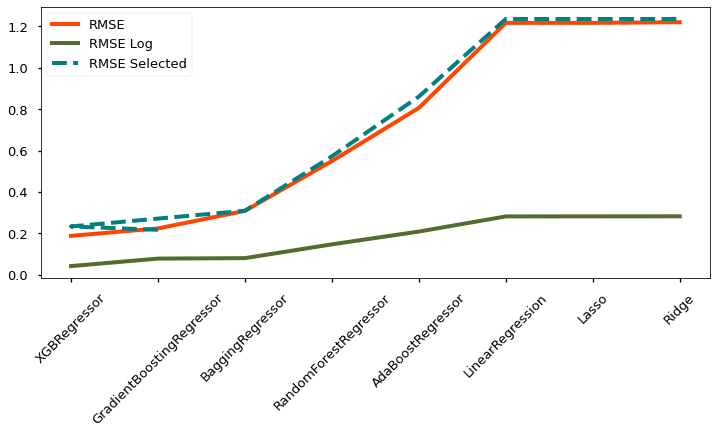

In [73]:
plt.figure(figsize=(12,5))
plt.plot(evaluation_rmse.Model,evaluation_rmse.RMSE, color='orangered', linewidth=4, label="RMSE")
plt.plot(evaluation_rmse_log.Model, evaluation_rmse_log.RMSE, color='darkolivegreen', linewidth=4, label="RMSE Log")
plt.plot(evaluation_rmse_sel.Model, evaluation_rmse_sel.RMSE, color='teal', linewidth=4, label="RMSE Selected", linestyle='dashed')
plt.xticks(rotation = 45) # Rotates X-Axis 
plt.legend()
plt.show()

### Best Model Prediction

In [86]:
xgb = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                 max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

### Train without Log

In [87]:
train_predictions = xgb.fit(X_train, y_train)
test_predictions =  train_predictions.predict(X_test)

[04:55:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Train with Log

In [88]:
train_predictions_log = xgb.fit(X_train, y_train_log)
test_predictions_log =  np.expm1(train_predictions_log.predict(X_test))

[04:55:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Train with Selected Features

In [89]:
train_predictions_sel = xgb.fit(X_train_sel, y_train_sel)
test_predictions_sel =  train_predictions_sel.predict(X_test_sel)

[04:55:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Ensemble Models

In [90]:
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =0)

In [91]:
gbr = gbr.fit(X_train, y_train)

In [92]:
xgb = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                 max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

In [93]:
xgb = xgb.fit(X_train, y_train)

[04:55:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [94]:
br = BaggingRegressor(n_estimators = 200, n_jobs = -1, random_state = 10)

In [95]:
br = br.fit(X_train, y_train)

In [96]:
def ensemble_models(X):
    return ((0.5 * br.predict(X)) +
           (0.3 * gbr.predict(X)) +            
           (0.2 * xgb.predict(X)))

In [97]:
ensemble_predictions = ensemble_models(X_test)

### Comapre Models

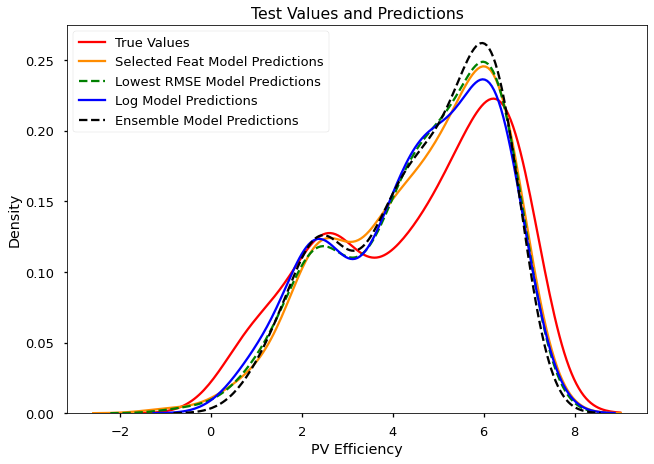

In [98]:
# Density plot of the final predictions and the test values
sns.kdeplot(y_test, label = 'True Values',color='red')
sns.kdeplot(test_predictions_sel, label = 'Selected Feat Model Predictions',color='darkorange')
sns.kdeplot(test_predictions, label = 'Lowest RMSE Model Predictions',color='green', linestyle='dashed')
sns.kdeplot(test_predictions_log, label = 'Log Model Predictions',color='blue')
sns.kdeplot(ensemble_predictions, label = 'Ensemble Model Predictions',color='black', linestyle='dashed')


# Label the plot
plt.xlabel('PV Efficiency'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

plt.legend()

plt.show()

### Model Selection

In [99]:
#best model is xgb with log-normalized target data by using the log(1+x)
y_log =  np.log1p(y)
model =  xgb.fit(X, y_log)

[04:55:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [100]:
pred = model.predict(X)
pred = np.expm1(pred)

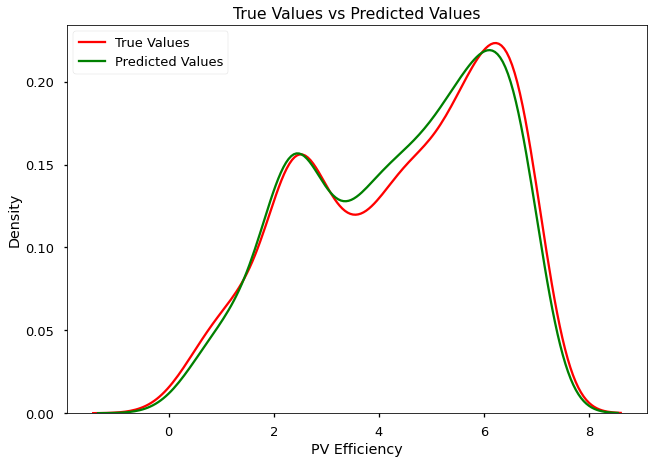

In [101]:
# Density plot of the final predictions and the test values
sns.kdeplot(y, label = 'True Values',color='red')
sns.kdeplot(pred, label = 'Predicted Values', color='green')

# Label the plot
plt.xlabel('PV Efficiency'); plt.ylabel('Density');
plt.title('True Values vs Predicted Values');

plt.legend()

plt.show()

In [102]:
#save model
dump(model, 'model.joblib')

['model.joblib']

In [127]:
pickle.dump(model, open("model.pkl", "wb"))

# Make Predictions for Future Dates

## Import Weather Data

In [ ]:
files.upload()

In [24]:
weather_data = pd.read_csv('oakland_min_max.csv')

## Extract Data for Model

In [25]:
weather_data["Date"] = weather_data["Date"].astype(str)
weather_data["DateTime"] = weather_data["Date"].apply(lambda x: datetime.strptime(x, "%Y%m%d"))
dt = pd.DatetimeIndex(weather_data['DateTime'])
weather_data.set_index(dt, inplace=True)

In [26]:
weather_data['day'] = dt.day
weather_data['month'] = dt.month
weather_data['year'] = dt.year

In [27]:
weather_data.reset_index(drop=True, inplace=True)

In [28]:
def get_future_dates(today, forecast_days):
  days = []
  for i in range(forecast_days):
    day = today + timedelta(i+1)
    days.append(day.strftime('%Y%m%d'))
  return days

In [29]:
today = date.today()
forecast_days = 3
next_days = get_future_dates(today, forecast_days)

In [30]:
weather_data = weather_data[weather_data['Date'].isin(next_days)]

In [31]:
weather_data

,Date,temperature_max,temperature_min,dewpoint_temp,relative_humidity,wind_speed,wind_direction,surface_pressure,cloud_cover,total_precipitation,snowfall,lat,lon,DateTime,day,month,year
1492,20220502,15.55,8.66,9.38,0.91,5.85,257.19,100838.26,0.76,0.0,0,37.804456,-122.271356,2022-05-02,2,5,2022
1493,20220503,21.23,8.51,5.97,0.79,4.53,280.68,100658.02,0.48,0.0,0,37.804456,-122.271356,2022-05-03,3,5,2022
1494,20220504,17.21,9.39,7.88,0.88,5.40,275.05,100365.39,0.27,0.0,0,37.804456,-122.271356,2022-05-04,4,5,2022


In [39]:
weather_train = weather_data[['temperature_max', 'temperature_min', 'dewpoint_temp', 'relative_humidity', 'wind_speed', 'wind_direction', 'surface_pressure', 'cloud_cover', 'total_precipitation', 'snowfall', 'lat', 'lon', 'day', 'month', 'year']]


## Predict on Loaded Model

In [33]:
#load model
loaded_model = load('model.joblib')

[17:39:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [34]:
#predit new data
new_preds = loaded_model.predict(weather_train)
#undo log normalization
new_preds = np.expm1(new_preds)

In [35]:
new_preds

array([4.061493 , 6.3343034, 6.114072 ], dtype=float32)

## Predicted Energy Generation

In [63]:
system_size = input("Enter System Size (in Watts): ")

Enter System Size (in Watts): 5520


In [102]:
info_df = weather_data[['Date','temperature_max', 'cloud_cover', 'total_precipitation', 'wind_speed', 'snowfall']]


In [103]:
info_df['PV_Efficiency (kWh/kW)'] = new_preds.tolist()

In [104]:
def calculate_pv_output(x):
    x = (x * int(system_size))/1000
    return float(round(x, 2))

In [105]:
info_df['Energy Generated (kWh)'] = info_df['PV_Efficiency (kWh/kW)'].apply(calculate_pv_output)

In [106]:
def convert_to_fahrenheit(x):
    x = x * 1.8 + 32
    return float(round(x, 2))

In [107]:
info_df['Temperature (°F)'] = info_df['temperature_max'].apply(convert_to_fahrenheit)

In [108]:
info_df = info_df.rename({'cloud_cover': 'Cloud Cover', 'total_precipitation': 'Total Precipitation' , 'snowfall': 'Snow Fall' , 'wind_speed': 'Wind Speed'}, axis=1)

In [109]:
info_df = info_df[['Date','Energy Generated (kWh)', 'PV_Efficiency (kWh/kW)', 'Temperature (°F)', 'Cloud Cover', 'Total Precipitation', 'Wind Speed', 'Snow Fall']]

In [111]:
info_df["Date"] = info_df["Date"].astype(str)
info_df["Date"] = info_df["Date"].apply(lambda x: datetime.strptime(x, "%Y%m%d"))

In [112]:
info_df["Date"] = info_df["Date"].dt.strftime('%m-%d-%Y')

In [113]:
info_df

,Date,Energy Generated (kWh),PV_Efficiency (kWh/kW),Temperature (°F),Cloud Cover,Total Precipitation,Wind Speed,Snow Fall
1492,05-02-2022,22.42,4.061493,59.99,0.76,0.0,5.85,0
1493,05-03-2022,34.97,6.334303,70.21,0.48,0.0,4.53,0
1494,05-04-2022,33.75,6.114072,62.98,0.27,0.0,5.40,0
